In [11]:
from src.Sonufy import AudioSpectrogramConverter
import matplotlib.pyplot as plt
import time
import librosa
import numpy as np

In [6]:
asc = AudioSpectrogramConverter(save_folder='data', n_mel_freq_components=64, shorten_factor=10)

In [7]:


start = time.time()

link = 'https://p.scdn.co/mp3-preview/01798ffa7c124bf206e3dcd82fcf63d586f63e38?cid=5f818fbc1c374e239ee0139163734165'


mel = asc.convert(link, '0')
sample_mel = mel[:,:64]

print(time.time() - start)


0.9072940349578857


In [8]:
mel.shape

(64, 1030)

In [9]:
mel

array([[-2.086 , -2.857 , -2.566 , ..., -2.074 , -2.295 , -1.937 ],
       [-1.162 , -1.651 , -1.441 , ..., -1.257 , -1.542 , -1.327 ],
       [-1.1045, -1.257 , -1.14  , ..., -1.015 , -1.167 , -1.334 ],
       ...,
       [-4.    , -4.    , -4.    , ..., -3.848 , -3.986 , -4.    ],
       [-4.    , -4.    , -4.    , ..., -3.822 , -3.99  , -4.    ],
       [-4.    , -4.    , -4.    , ..., -3.988 , -3.99  , -4.    ]],
      dtype=float16)

In [5]:
mel.min()

-4.062

In [6]:
np.save('data/samplenpy.npy', mel)

In [7]:
from src.Sonufy import AudioDataGenerator

In [8]:
test_gen = AudioDataGenerator(1, (64,64), directory='data')

['samplenpy.npy']
Found 1 files for prediction set


In [9]:
test_gen.files

['samplenpy.npy']

In [10]:
test = test_gen.take(0, num_tiles=32)

In [11]:
test[0].shape

(32, 64, 64, 1)

In [12]:
test = test_gen.get_tensors_from_data(mel, 32)

In [13]:
test[0].shape

(32, 64, 64, 1)

In [14]:
test = test_gen.take(0, num_tiles=32)

In [15]:
test[0].shape

(32, 64, 64, 1)

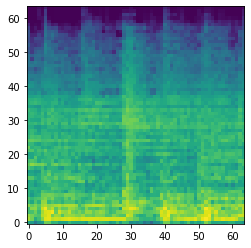

In [16]:
plt.imshow(test[0][24], origin='lower')

In [6]:
from pyarrow import feather

all_tracks = feather.read_feather('data/all_tracks.feather')

In [7]:
all_tracks

,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date
0,79620P7nP5cSS7f8ULHfo8,Ha-le-lu-ja,https://p.scdn.co/mp3-preview/54111ab335474758...,18,spotify:track:79620P7nP5cSS7f8ULHfo8,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2007-11-22
1,0uV7yccuJBzpz2A9bYvVKD,Ciao D'Amore,None,35,spotify:track:0uV7yccuJBzpz2A9bYvVKD,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,1998-01-01
2,5k8nNRu2aOjssNyCPzmax3,Gott schütze die Frauen - Radio Version,https://p.scdn.co/mp3-preview/e5bdcf4b6163a4b0...,34,spotify:track:5k8nNRu2aOjssNyCPzmax3,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2004-03-09
3,7ATZe396iKRxqYtqXGRlq5,Die längste Nacht der Welt,None,31,spotify:track:7ATZe396iKRxqYtqXGRlq5,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2000-01-01
4,7Jj23tl4vV4SblQgYZgCAL,Her mit meinen Hennen (Der Goggala),https://p.scdn.co/mp3-preview/56e52c31b64dad3d...,31,spotify:track:7Jj23tl4vV4SblQgYZgCAL,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2007-11-22
...,...,...,...,...,...,...,...,...,...,...
638535,7310HkEbJ2SLziIte7WZSi,Gott is a Dirndl,https://p.scdn.co/mp3-preview/92807dcc461ecf74...,43,spotify:track:7310HkEbJ2SLziIte7WZSi,Melissa Naschenweng,00unybLgvbIqKxx0OTyYYZ,"[partyschlager, schlager]",47,None
638536,1IzYuIgrzZhUp9yomTowk0,Die ganze Nacht - Dance Mix,https://p.scdn.co/mp3-preview/81b696e709b644cf...,41,spotify:track:1IzYuIgrzZhUp9yomTowk0,Melissa Naschenweng,00unybLgvbIqKxx0OTyYYZ,"[partyschlager, schlager]",47,None
638537,2sUXc7xn5Xy3mmTcLfOxHo,Braungebrannte Haut,https://p.scdn.co/mp3-preview/ed41988000214477...,40,spotify:track:2sUXc7xn5Xy3mmTcLfOxHo,Melissa Naschenweng,00unybLgvbIqKxx0OTyYYZ,"[partyschlager, schlager]",47,None
638538,0OxNysTH08lf6SS2GInHx9,Die Nachbarin,https://p.scdn.co/mp3-preview/765395036326c9b6...,40,spotify:track:0OxNysTH08lf6SS2GInHx9,Melissa Naschenweng,00unybLgvbIqKxx0OTyYYZ,"[partyschlager, schlager]",47,None


In [8]:
row = all_tracks.iloc[0]

In [9]:
row.track_id

'79620P7nP5cSS7f8ULHfo8'

In [1]:
all_tracks = all_tracks[~all_tracks.track_preview_link.isna()]

NameError: name 'all_tracks' is not defined

In [37]:
from pyarrow import feather

all_tracks = feather.read_feather('data/all_tracks.feather')

In [38]:
all_tracks_shuffled = all_tracks.sample(frac=1)

In [39]:
feather.write_feather(all_tracks_shuffled, 'data/all_tracks_shuffled.feather')

In [40]:
from src.Sonufy import Sonufy

sonufy = Sonufy(latent_dims=128, output_size=(64,64), all_tracks_file='data/all_tracks_shuffled.feather')

In [68]:
sonufy.all_tracks.iloc[13925].track_id

'1h3uNQbygnqaQS8OaQnrlF'

In [69]:
import numpy as np
test = np.load('data/mels/1h3uNQbygnqaQS8OaQnrlF.npy')

In [70]:
np.isnan(test.max())

True

In [42]:
sonufy.download_links(save_folder='data')

/Users/michaelroth/Documents/Flatiron/Projects/song-similarity-app/src/audio_functions.py:105: RuntimeWarning: invalid value encountered in true_divide
  specgram /= specgram.max()  # volume normalize to max 1


/Users/michaelroth/Documents/Flatiron/Projects/song-similarity-app/src/audio_functions.py:105: RuntimeWarning: invalid value encountered in true_divide
  specgram /= specgram.max()  # volume normalize to max 1


KeyboardInterrupt: 

In [3]:
sonufy.build_model()

In [32]:
sonufy.train(mel_directory='data/test/mels', epochs=100, train_test_split=.2)

Found 576 files for training set
Found 144 files for testing set
Epoch 1/100
18/18 [==============================] - 4s 220ms/step - loss: 4.7778 - val_loss: 4.8352
Epoch 2/100
 1/18 [>.............................] - ETA: 3s - loss: 5.0319

KeyboardInterrupt: 

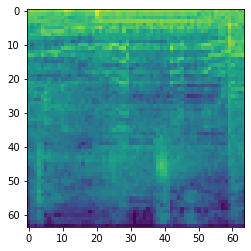

In [33]:
import matplotlib.pyplot as plt

test_img = sonufy.train_test_generator.take(0)[0]

plt.imshow(test_img[0])

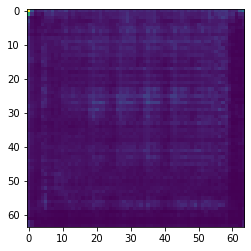

In [34]:
test = sonufy.autoencoder(test_img)

plt.imshow(test[0])